In [1]:
pip install pandas scikit-learn imbalanced-learn matplotlib seaborn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 16.5 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/11.1 MB 15.6 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.1 MB 16.4 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/11.1 MB 16.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.4/11.1 MB 18.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.1 MB 20.7 MB/s eta 0:00:01
   -------------------------- ------------- 7.5/11.1 MB 21.7 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 22.8 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------  11.1/11.1 MB 25.2 MB/s eta 0:00


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/sharadhakarkata/Desktop/pyp/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


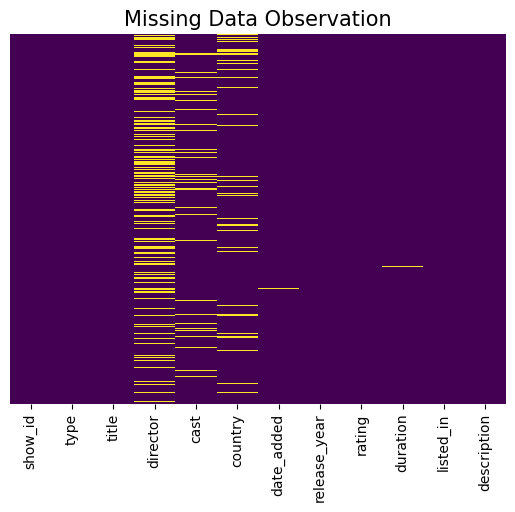

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');
plt.title("Missing Data Observation", fontsize = 15)
plt.show()

In [6]:
type_value = df['type'].value_counts()

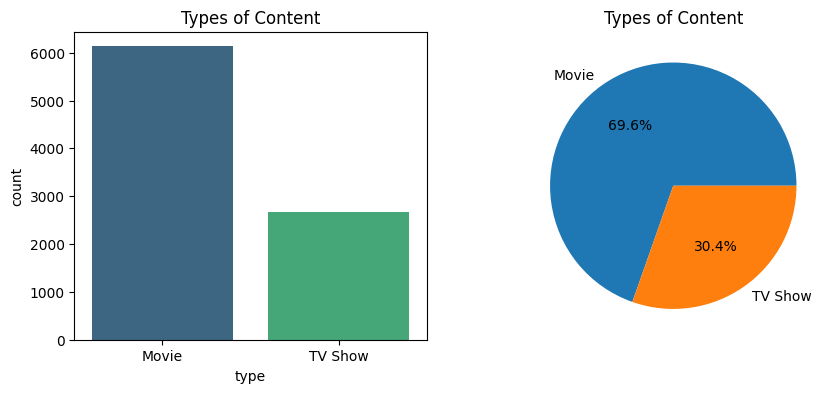

In [7]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
sns.countplot(data = df, x = 'type', palette = 'viridis', ax = axes[0])
axes[0].set_title('Types of Content')
axes[1].pie(type_value, labels = type_value.index, autopct = '%1.1f%%')
axes[1].set_title('Types of Content')
plt.show()

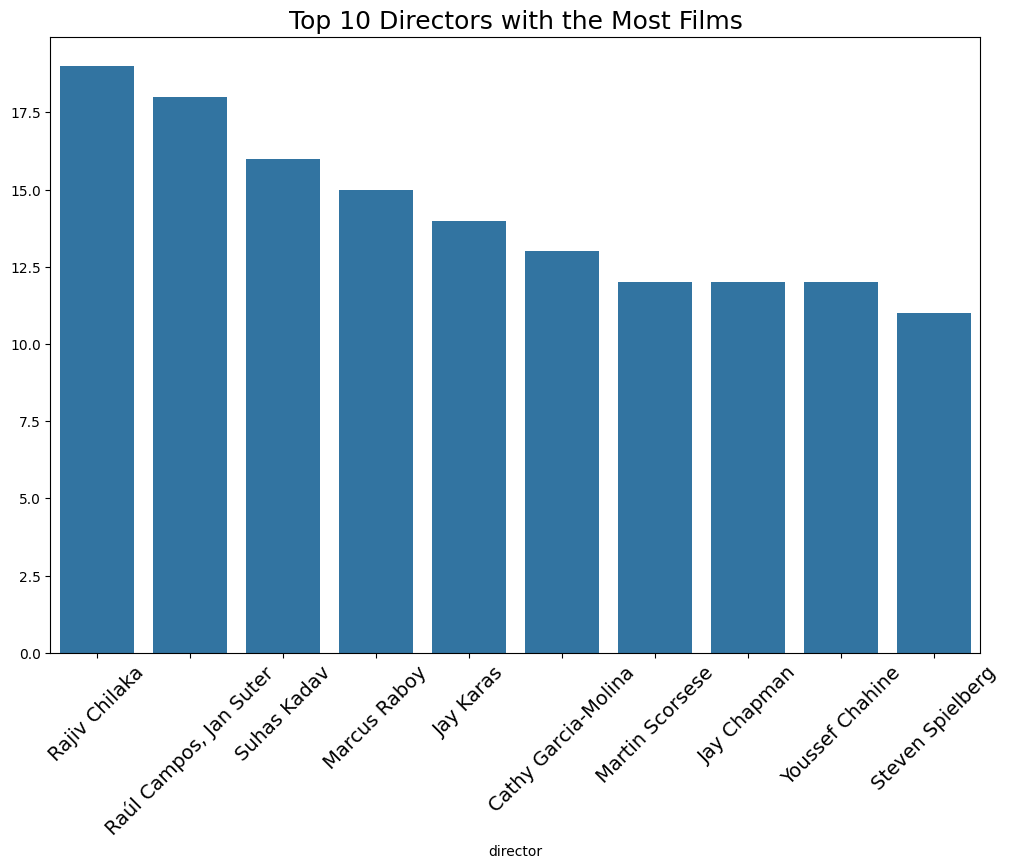

In [8]:
director_film = df[df["type"] == "Movie"]["director"].value_counts()[:10]
plt.figure(figsize = (12,8))
sns.barplot(x = director_film.index, y = director_film.values)
plt.xticks(rotation = 45, fontsize = 14)
plt.title("Top 10 Directors with the Most Films",fontsize = 18)
plt.show()

In [9]:
top10_country = df['country'].value_counts().nlargest(10)
top10_country

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

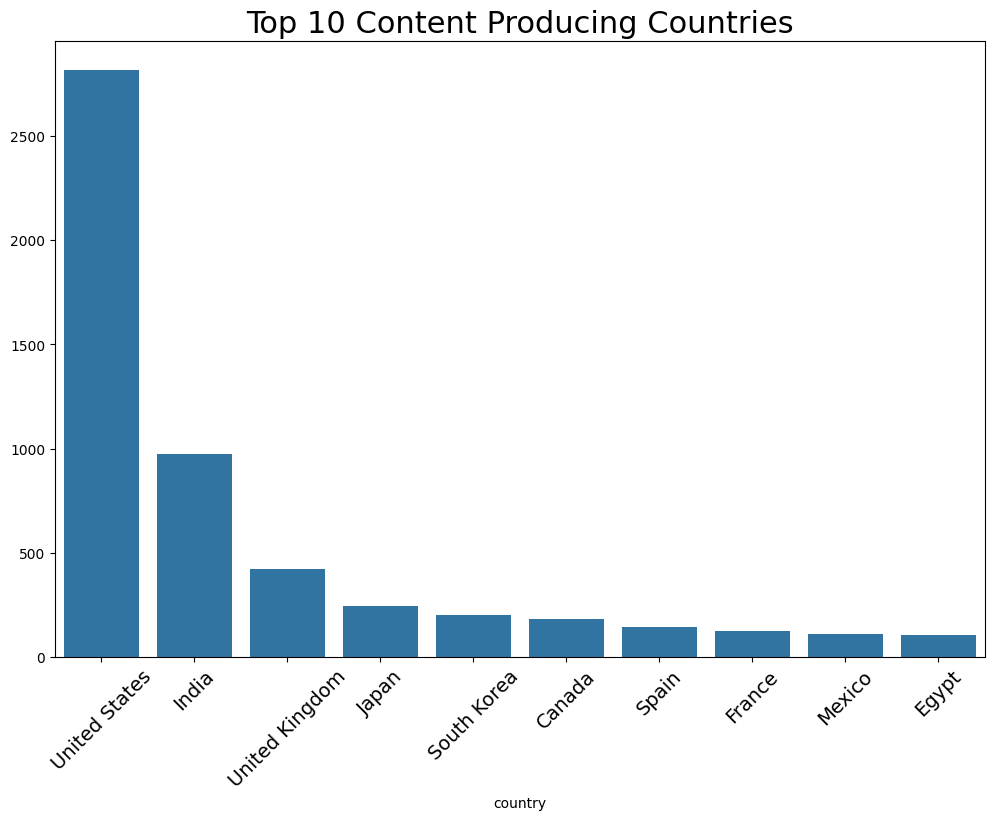

In [10]:
plt.figure(figsize = (12,8))
sns.barplot(x = top10_country.index, y = top10_country.values)
plt.title("Top 10 Content Producing Countries", fontsize = 22)
plt.xticks(rotation = 45, fontsize = 14)
plt.show()


In [11]:
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

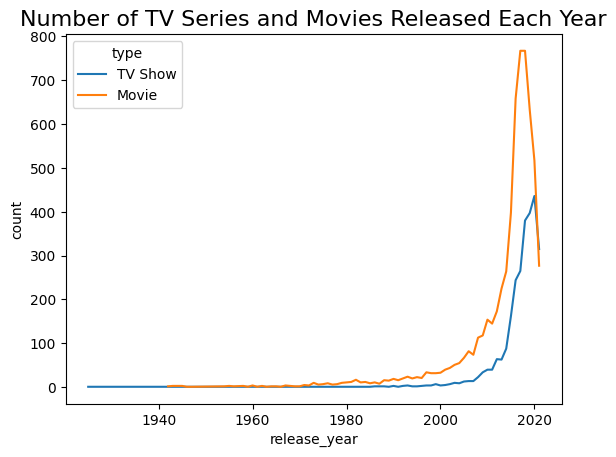

In [12]:
release_counts = df.groupby(["release_year", "type"]).size().reset_index(name="count")
sns.lineplot(data=release_counts, x="release_year", y="count", hue="type")
plt.title("Number of TV Series and Movies Released Each Year", fontsize = 16)
plt.show()

In [13]:
df['year_added'] = df['year_added'].fillna(0).astype(int)
print(df['year_added'].dtype)

int64


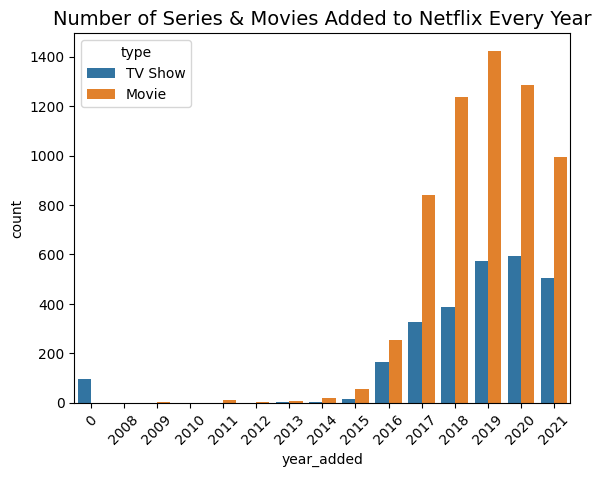

In [14]:
content_counts = df.groupby(["year_added", "type"]).size().reset_index(name = "count")
sns.barplot(x = "year_added", y = "count", data = content_counts, hue = "type")
plt.xticks(rotation = 45)
plt.title("Number of Series & Movies Added to Netflix Every Year",fontsize = 14)
plt.show()

In [15]:
df["listed_in"]

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

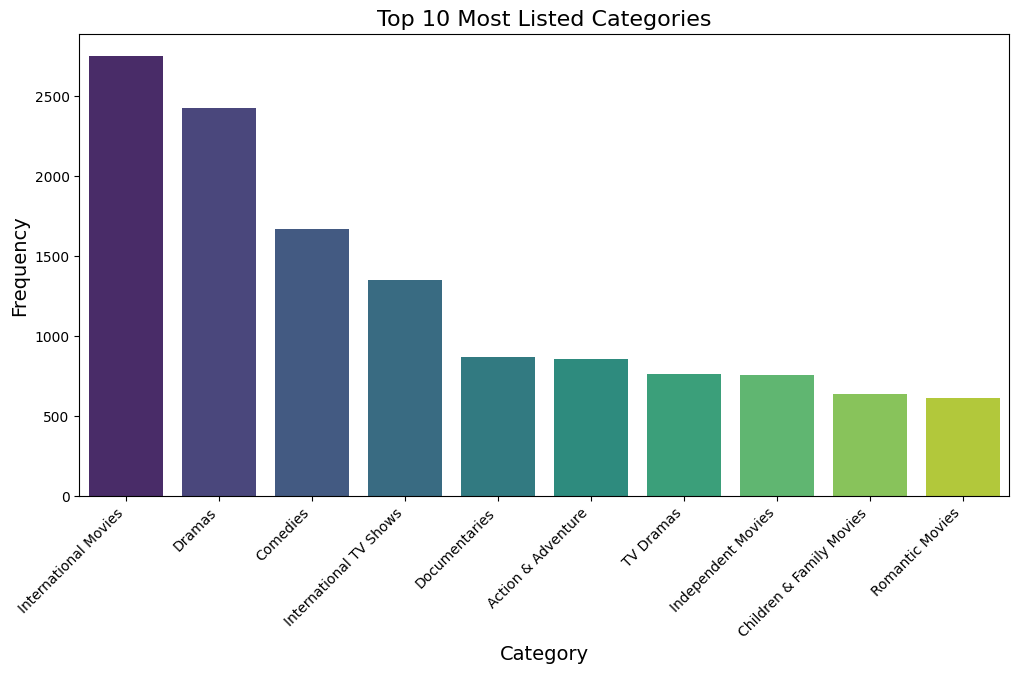

In [16]:
categories = df['listed_in'].str.split(',').explode().str.strip()  
top_10_categories = categories.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')

plt.title('Top 10 Most Listed Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

In [18]:
Horror = df[df["listed_in"].isin(["Horror Movies","Thrillers"])]["release_year"].value_counts()

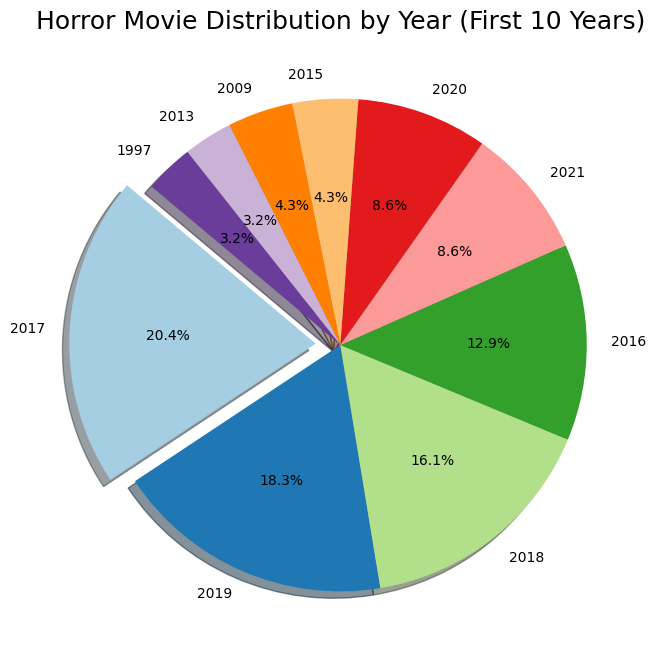

In [19]:
top_10_horror = Horror.sort_values(ascending=False).head(10)
explode = [0.1 if value == top_10_horror.max() else 0 for value in top_10_horror.values]
plt.figure(figsize=(8, 8))
plt.pie(top_10_horror.values, labels=top_10_horror.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=plt.cm.Paired.colors, shadow = 0.6)
plt.title("Horror Movie Distribution by Year (First 10 Years)", fontsize=18)
plt.show()